# Assignment 6
This notebook covers the exercises for the next two weeks. Please upload your solution both in Whiteboard and eduflow.
    The deadline is Monday, January 24, 11:55 am.

## Exercise 11 OpenPose
### 11.0 Introduction
In this assignment, we will try to have an overlook on OpenPose algorithm (https://arxiv.org/pdf/1812.08008.pdf). Instinctively, we could try to recognize human pose by making a network who perform a segmentation on each articulation of human body. Then we would just need to link all the joints together to make a digital skeleton, not that simple of course. For instance, ff there are several persons in the same image, how do you link the correct neck with the fitting head?
The idea behind this algorithm is to have to different maps: Part Affinity Fields (PAFs) and Part Confidence Maps (PCMs).

In [1]:
from IPython.display import Image
Image(url="https://www.researchgate.net/publication/332669619/figure/fig5/AS:751775762092034@1556248717717/Part-Affinity-Fields-Architecture-Figure-1.ppm")

You can see network structure above. Branch 1 and 2 are respectively in charge of generating PCM and PAF thru multiple stages to have more accuracy.

In [2]:
Image(url= "https://news.mynavi.jp/article/cv_future-47/index_images/index.jpg")

The first network generating the PCM finds each part of the body (elbow, neck, etc... see colored points above) and the network generating the PAF is linking the parts  (orange field above). Then we apply a greedy/hongarian algorithm to link the parts which are most probably joined.

## 11.1 Setup the network and modify it.

We will use a pretrained network to do all of the work. All the code is in the folder "openpose". You should first of all download the weights of the network, the two files: "body_pose_model.pth" (199.57Mb) et "hand_pose_model.pth" (140.52Mb) (https://www.dropbox.com/sh/7xbup2qsn7vvjxo/AABWFksdlgOMXR_r5v3RwKRYa?dl=0) and place them into a "model" folder you create. Then the few line beneath should run perfectly.

We want you to get into the code of the network in the folder "openpose/body" and you should modify it to be able to access the PCM and PAF. Remember, like for the segmentation there are as many layers as there are labels. Then you should be able to overlay the original image with one of the maps (only one layer of each map).

In [3]:
import sys
sys.path.insert(0, 'openpose')
import cv2
import model
import util
from hand import Hand
from body import Body
import matplotlib.pyplot as plt
import copy
import numpy as np
import torch
import glob
import os

body_estimation = Body('openpose/models/body_pose_model.pth')
hand_estimation = Hand('openpose/models/hand_pose_model.pth')

part={
    "nose":0,
    "neck":1,
    "right_shldr":2,
    "right_elbw":3,
    "right_wrst":4,
    "left_shldr":5,
    "left_elbw":6,
    "left_wrst":7,
    "right_hps":8,
    "right_kn":9,
    "right_nkl":10,
    "left_hps":11,
    "left_kn":12,
    "left_nkl":13,
    "right_eye":14,
    "left_eye":15,
    "right_hear":16,
    "left_hear":17
}

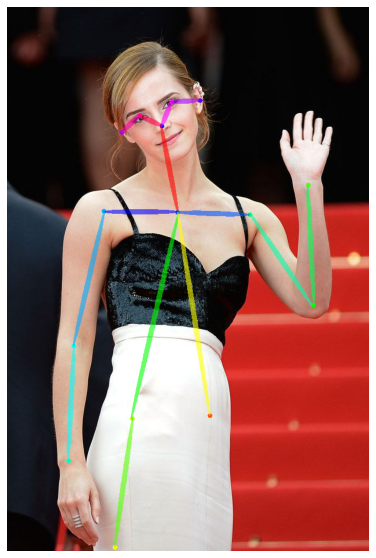

In [4]:
test_image = 'images/watson_demo.jpg'

def estimate_plot(filename):
    objtohighlight = part["neck"]
    oriImg = cv2.imread(filename)  # B,G,R order
    candidate, subset = body_estimation(oriImg)
    canvas = copy.deepcopy(oriImg)
    canvas = util.draw_bodypose(canvas, candidate, subset)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(canvas[:, :, [2, 1, 0]])
    plt.axis('off')
    plt.show()
    
estimate_plot(test_image)

In [5]:
#TODO

## 11.2 Investigate on wrong detection

Now that you have your brand new tools, we have we have six images in a folder "images/weirdos_filtered" this images suffer of wrong classifications for obvious reasons. Try for each one to say at which point in the algorithm things went wrong based on your heatmaps. If you have ideas of tools to investigate, do not hesitate, we take  all ideas into account. ;)

In [6]:
#TODO

## Exercise 12: Compact Comvolutional Transformers (CCT)

In this updated exercise, we will work on CCTs and the provided implementation from the authors of the [Paper](https://arxiv.org/pdf/2104.05704.pdf). You will find the repository [here](https://github.com/SHI-Labs/Compact-Transformers). The focus of this exercise is on utilizing provided code and reproducing results. We will work with the CIFAR10 dataset. The code is primarily designed to run on GPUs. If you do not have access to a gpu, you can use Colab (I did as well).

### 12.0: Clone the repository and load CIFAR10

I suggest using this handy tool to process the official CIFAR10 files from the official source: [https://github.com/knjcode/cifar2png](https://github.com/knjcode/cifar2png) It processes the pickled batch files into the directory structure used by the train.py function provided in the repo.

In [12]:
#TODO

### 12.1 Train the smallest model proposed in the repo

I ran a few epochs which the model configuration cct_2_3x2_32 on colab and it did not take too long. What is the top1 classification accuracy after 30 epochs? What might be the reason for using "Warmup epochs", especially for training Transformers? **(RESULT)**

In [ ]:
!pip install timm
import timm

In [ ]:
#TODO

### 12.2: Visualization

Plot the input and prediction using at least 10 test samples. **(RESULT)**

In [ ]:
#TODO

### 12.3: Image patching using a Conv Layer

The original Vision Transformer (ViT) architecture does not use Conv Layers to create the inputs for the Transformer Block. ViT uses patches of the image with no overlap (see bottom left in the image below). This process can be accelerated using a conv layer, too. Create image patches from an image of your choice using a convolution implementation, e.g., from PyTorch. **(RESULT)**

In [1]:
from IPython.display import Image
Image(url="https://miro.medium.com/max/1400/1*etrfupovfQO4JbBm26Y_cw.png")

In [ ]:
#TODO

### Congratz, you made it through Assignment 6! You can now try to solve this optional exercise.

This exercise is not graded, but might be a good preparation for the exam.

Please go to the following link: [Google Form](https://forms.gle/BLM6hyrxTYnteB9K6).


In the form, you will find the optional task (and the corresponding consent form in case you agree with us processing your data). The task is formulated in German, and we would prefer German as the language for your answer. However, if you don’t feel comfortable with that, please feel free to solve it in English.